Estimated probabilities 0.8990336219045695
Estimated probabilities 0.657142857142857
Estimated probabilities 0.3870967741935485
Total reward earned =  8966.0
Overall win rate =  0.8966
Number of times explored =  96
Number of times exploited =  9904
Number of optimal pulls =  9902


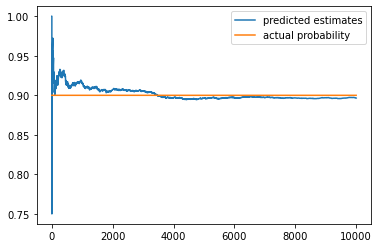

In [1]:
## Multi-Arm Bandit code
import numpy as np
import matplotlib.pyplot as plt
Bandit_probs= [0.9,0.8,0.5]
epsilon = 0.01
num_trails = 10000

class Bandit:
    def __init__(self, prob):
        self.actual_prob = prob
        self.prob_estimate = 0
        self.N = 0
    def pull(self):
        return np.random.random()<self.actual_prob
    def update(self,x):
        self.N+=1
        self.prob_estimate+=(1/self.N)*(x-self.prob_estimate)
    
def experiment():
    bandits = [Bandit(p) for p in Bandit_probs]
    rewards = np.zeros(num_trails)
    num_explored = 0
    num_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.actual_prob for b in bandits])
    for i in range(num_trails):
        if np.random.random()<epsilon:
            num_explored +=1
            j = np.random.choice(len(bandits))
        else:
            num_exploited +=1
            j = np.argmax([b.prob_estimate for b in bandits])
            if j == optimal_j:
                num_optimal+=1
        
        rewards[i] = bandits[j].pull()
        bandits[j].update(rewards[i])
    for b in bandits:
        print("Estimated probabilities", b.prob_estimate)
        
    print("Total reward earned = ", rewards.sum())
    print("Overall win rate = ", rewards.sum()/num_trails)
    print("Number of times explored = ", num_explored)
    print("Number of times exploited = ", num_exploited)
    print("Number of optimal pulls = ", num_optimal)
    
    #plot the results
    cummulative_rewards = np.cumsum(rewards)
    win_rates = cummulative_rewards/(np.arange(num_trails)+1)
    plt.plot(win_rates, label = "predicted estimates")
    plt.plot(np.ones(num_trails)*np.max(Bandit_probs), label = 'actual probability')
    plt.legend()
    plt.show()
    
if __name__ == "__main__":
    experiment()

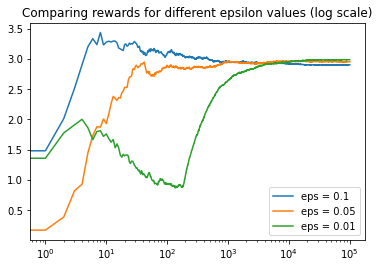

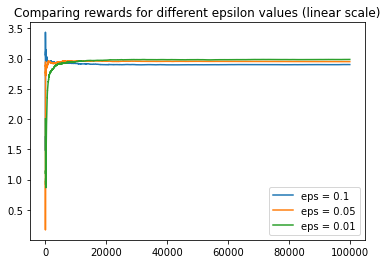

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

def run_experiment(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)
    
    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  # for b in bandits:
  #   print(b.mean)

  return cumulative_average

if __name__ == '__main__':
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.title("Comparing rewards for different epsilon values (log scale)")
  plt.show()

  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.title("Comparing rewards for different epsilon values (linear scale)")
  plt.legend()
  plt.show()